## Santander Customer Satisfaction prediction
* data from https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied proportion {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied proportion 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
#replace NaN(-999999) value
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [9]:
# split data into feature and target
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print('feature data shape:{0}'.format(X_features.shape))

feature data shape:(76020, 369)


In [11]:
from sklearn.model_selection import train_test_split

#to stratify,  stratifiy = y_labels
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(train_cnt, test_cnt)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

60816 15204
0    0.960438
1    0.039562
Name: TARGET, dtype: float64
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf=XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

[0]	validation_0-auc:0.806131	validation_1-auc:0.778639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.811867	validation_1-auc:0.784901
[2]	validation_0-auc:0.81454	validation_1-auc:0.788032
[3]	validation_0-auc:0.816373	validation_1-auc:0.790142
[4]	validation_0-auc:0.817591	validation_1-auc:0.791164
[5]	validation_0-auc:0.821018	validation_1-auc:0.794698
[6]	validation_0-auc:0.822843	validation_1-auc:0.796272
[7]	validation_0-auc:0.824045	validation_1-auc:0.796976
[8]	validation_0-auc:0.823207	validation_1-auc:0.796625
[9]	validation_0-auc:0.822984	validation_1-auc:0.796541
[10]	validation_0-auc:0.821323	validation_1-auc:0.795906
[11]	validation_0-auc:0.823286	validation_1-auc:0.796844
[12]	validation_0-auc:0.824967	validation_1-auc:0.79843
[13]	validation_0-auc:0.823987	validation_1-auc:0.797144
[14]	validation_0-auc:0.825334	validation_1-auc:0.798617

[141]	validation_0-auc:0.865204	validation_1-auc:0.824012
[142]	validation_0-auc:0.865296	validation_1-auc:0.824098
[143]	validation_0-auc:0.865413	validation_1-auc:0.824031
[144]	validation_0-auc:0.865482	validation_1-auc:0.824067
[145]	validation_0-auc:0.865664	validation_1-auc:0.823951
[146]	validation_0-auc:0.865727	validation_1-auc:0.823939
[147]	validation_0-auc:0.865977	validation_1-auc:0.823965
[148]	validation_0-auc:0.86606	validation_1-auc:0.823847
[149]	validation_0-auc:0.866117	validation_1-auc:0.823899
[150]	validation_0-auc:0.866148	validation_1-auc:0.823896
[151]	validation_0-auc:0.866232	validation_1-auc:0.823841
[152]	validation_0-auc:0.866293	validation_1-auc:0.823723
[153]	validation_0-auc:0.866364	validation_1-auc:0.823744
[154]	validation_0-auc:0.866578	validation_1-auc:0.823682
[155]	validation_0-auc:0.8667	validation_1-auc:0.823632
[156]	validation_0-auc:0.866765	validation_1-auc:0.823568
[157]	validation_0-auc:0.866973	validation_1-auc:0.823512
[158]	validation_

In [17]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_chile_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_probs(X_test)[:,1], average='macro')

C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.720655	validation_1-auc:0.691027
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.818365	validation_1-auc:0.786333
[2]	validation_0-auc:0.810289	validation_1-auc:0.779506
[3]	validation_0-auc:0.81983	validation_1-auc:0.788427
[4]	validation_0-auc:0.825581	validation_1-auc:0.792933
[5]	validation_0-auc:0.823189	validation_1-auc:0.790496
[6]	validation_0-auc:0.821652	validation_1-auc:0.789089
[7]	validation_0-auc:0.829111	validation_1-auc:0.796181
[8]	validation_0-auc:0.832907	validation_1-auc:0.801315
[9]	validation_0-auc:0.832609	validation_1-auc:0.798545
[10]	validation_0-auc:0.837461	validation_1-auc:0.80307
[11]	validation_0-auc:0.841006	validation_1-auc:0.805791
[12]	validation_0-auc:0.842523	validation_1-auc:0.807897
[13]	validation_0-auc:0.842649	validation_1-auc:0.808051
[14]	validation_0-auc:0.842022	validation_1-auc:0.806522


[40]	validation_0-auc:0.860616	validation_1-auc:0.816071
[41]	validation_0-auc:0.860798	validation_1-auc:0.815822
[42]	validation_0-auc:0.862028	validation_1-auc:0.816945
[43]	validation_0-auc:0.862269	validation_1-auc:0.816688
[44]	validation_0-auc:0.863384	validation_1-auc:0.817125
[45]	validation_0-auc:0.863255	validation_1-auc:0.816002
[46]	validation_0-auc:0.864032	validation_1-auc:0.81749
[47]	validation_0-auc:0.86476	validation_1-auc:0.818366
[48]	validation_0-auc:0.865259	validation_1-auc:0.81837
[49]	validation_0-auc:0.865982	validation_1-auc:0.818243
[50]	validation_0-auc:0.866327	validation_1-auc:0.818245
[51]	validation_0-auc:0.867481	validation_1-auc:0.819436
[52]	validation_0-auc:0.868294	validation_1-auc:0.820131
[53]	validation_0-auc:0.868706	validation_1-auc:0.820722
[54]	validation_0-auc:0.869396	validation_1-auc:0.8209
[55]	validation_0-auc:0.86983	validation_1-auc:0.821348
[56]	validation_0-auc:0.870181	validation_1-auc:0.821504
[57]	validation_0-auc:0.87062	validat

[82]	validation_0-auc:0.874324	validation_1-auc:0.823758
[83]	validation_0-auc:0.87472	validation_1-auc:0.823835
[84]	validation_0-auc:0.875074	validation_1-auc:0.823964
[85]	validation_0-auc:0.875317	validation_1-auc:0.824349
[86]	validation_0-auc:0.875699	validation_1-auc:0.82432
[87]	validation_0-auc:0.875872	validation_1-auc:0.824157
[88]	validation_0-auc:0.876089	validation_1-auc:0.824339
[89]	validation_0-auc:0.876296	validation_1-auc:0.824424
[90]	validation_0-auc:0.8763	validation_1-auc:0.824366
[91]	validation_0-auc:0.876347	validation_1-auc:0.824364
[92]	validation_0-auc:0.876643	validation_1-auc:0.824319
[93]	validation_0-auc:0.876712	validation_1-auc:0.824247
[94]	validation_0-auc:0.876804	validation_1-auc:0.824126
[95]	validation_0-auc:0.876876	validation_1-auc:0.824183
[96]	validation_0-auc:0.877268	validation_1-auc:0.824061
[97]	validation_0-auc:0.877293	validation_1-auc:0.82404
[98]	validation_0-auc:0.87741	validation_1-auc:0.824136
[99]	validation_0-auc:0.877726	valida

[22]	validation_0-auc:0.848179	validation_1-auc:0.810406
[23]	validation_0-auc:0.850126	validation_1-auc:0.812894
[24]	validation_0-auc:0.851034	validation_1-auc:0.81368
[25]	validation_0-auc:0.851302	validation_1-auc:0.813129
[26]	validation_0-auc:0.851164	validation_1-auc:0.81177
[27]	validation_0-auc:0.853206	validation_1-auc:0.813621
[28]	validation_0-auc:0.854552	validation_1-auc:0.81485
[29]	validation_0-auc:0.854946	validation_1-auc:0.815486
[30]	validation_0-auc:0.855846	validation_1-auc:0.816059
[31]	validation_0-auc:0.856649	validation_1-auc:0.815992
[32]	validation_0-auc:0.856564	validation_1-auc:0.815918
[33]	validation_0-auc:0.857157	validation_1-auc:0.815729
[34]	validation_0-auc:0.856779	validation_1-auc:0.815053
[35]	validation_0-auc:0.858431	validation_1-auc:0.816451
[36]	validation_0-auc:0.859169	validation_1-auc:0.817167
[37]	validation_0-auc:0.859639	validation_1-auc:0.816895
[38]	validation_0-auc:0.859803	validation_1-auc:0.8161
[39]	validation_0-auc:0.860322	valid

[64]	validation_0-auc:0.870066	validation_1-auc:0.823103
[65]	validation_0-auc:0.870302	validation_1-auc:0.823198
[66]	validation_0-auc:0.870362	validation_1-auc:0.823035
[67]	validation_0-auc:0.870754	validation_1-auc:0.823382
[68]	validation_0-auc:0.871191	validation_1-auc:0.823695
[69]	validation_0-auc:0.871356	validation_1-auc:0.823905
[70]	validation_0-auc:0.871587	validation_1-auc:0.823851
[71]	validation_0-auc:0.871868	validation_1-auc:0.824121
[72]	validation_0-auc:0.871953	validation_1-auc:0.823994
[73]	validation_0-auc:0.872195	validation_1-auc:0.824011
[74]	validation_0-auc:0.872485	validation_1-auc:0.82411
[75]	validation_0-auc:0.872735	validation_1-auc:0.824464
[76]	validation_0-auc:0.872945	validation_1-auc:0.824353
[77]	validation_0-auc:0.873013	validation_1-auc:0.824358
[78]	validation_0-auc:0.873478	validation_1-auc:0.824171
[79]	validation_0-auc:0.873821	validation_1-auc:0.82405
[80]	validation_0-auc:0.874017	validation_1-auc:0.82419
[81]	validation_0-auc:0.874194	val

[4]	validation_0-auc:0.839136	validation_1-auc:0.802949
[5]	validation_0-auc:0.838857	validation_1-auc:0.799001
[6]	validation_0-auc:0.838945	validation_1-auc:0.795856
[7]	validation_0-auc:0.844744	validation_1-auc:0.802631
[8]	validation_0-auc:0.848771	validation_1-auc:0.806496
[9]	validation_0-auc:0.848273	validation_1-auc:0.805098
[10]	validation_0-auc:0.851728	validation_1-auc:0.808975
[11]	validation_0-auc:0.853785	validation_1-auc:0.810686
[12]	validation_0-auc:0.855659	validation_1-auc:0.811929
[13]	validation_0-auc:0.855234	validation_1-auc:0.810064
[14]	validation_0-auc:0.855474	validation_1-auc:0.808859
[15]	validation_0-auc:0.856744	validation_1-auc:0.811025
[16]	validation_0-auc:0.858538	validation_1-auc:0.8114
[17]	validation_0-auc:0.860151	validation_1-auc:0.812896
[18]	validation_0-auc:0.861117	validation_1-auc:0.814146
[19]	validation_0-auc:0.860887	validation_1-auc:0.811887
[20]	validation_0-auc:0.862193	validation_1-auc:0.812535
[21]	validation_0-auc:0.862595	validati

[46]	validation_0-auc:0.88141	validation_1-auc:0.816184
[47]	validation_0-auc:0.882469	validation_1-auc:0.816764
[48]	validation_0-auc:0.883357	validation_1-auc:0.816224
Stopping. Best iteration:
[18]	validation_0-auc:0.860179	validation_1-auc:0.81747

[0]	validation_0-auc:0.723783	validation_1-auc:0.691561
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.823235	validation_1-auc:0.78614
[2]	validation_0-auc:0.813929	validation_1-auc:0.772396
[3]	validation_0-auc:0.830963	validation_1-auc:0.793724
[4]	validation_0-auc:0.837608	validation_1-auc:0.800087
[5]	validation_0-auc:0.834846	validation_1-auc:0.796883
[6]	validation_0-auc:0.835955	validation_1-auc:0.796911
[7]	validation_0-auc:0.841399	validation_1-auc:0.801311
[8]	validation_0-auc:0.845121	validation_1-auc:0.804335
[9]	validation_0-auc:0.846487	validation_1-auc:0.803113
[10]	validation_0-auc:0.850436	

[35]	validation_0-auc:0.874648	validation_1-auc:0.816082
[36]	validation_0-auc:0.875895	validation_1-auc:0.816718
[37]	validation_0-auc:0.876131	validation_1-auc:0.815768
[38]	validation_0-auc:0.876443	validation_1-auc:0.814233
[39]	validation_0-auc:0.876876	validation_1-auc:0.813944
[40]	validation_0-auc:0.877292	validation_1-auc:0.813375
[41]	validation_0-auc:0.877321	validation_1-auc:0.813232
[42]	validation_0-auc:0.878573	validation_1-auc:0.814744
[43]	validation_0-auc:0.878719	validation_1-auc:0.814481
[44]	validation_0-auc:0.88018	validation_1-auc:0.81558
[45]	validation_0-auc:0.880406	validation_1-auc:0.814163
[46]	validation_0-auc:0.881668	validation_1-auc:0.814833
[47]	validation_0-auc:0.882494	validation_1-auc:0.815245
[48]	validation_0-auc:0.883163	validation_1-auc:0.815411
[49]	validation_0-auc:0.883356	validation_1-auc:0.815518
[50]	validation_0-auc:0.883283	validation_1-auc:0.815163
[51]	validation_0-auc:0.884405	validation_1-auc:0.816061
[52]	validation_0-auc:0.885147	va

[24]	validation_0-auc:0.851132	validation_1-auc:0.816696
[25]	validation_0-auc:0.851516	validation_1-auc:0.816971
[26]	validation_0-auc:0.852111	validation_1-auc:0.816988
[27]	validation_0-auc:0.852798	validation_1-auc:0.817275
[28]	validation_0-auc:0.853777	validation_1-auc:0.818252
[29]	validation_0-auc:0.855294	validation_1-auc:0.818947
[30]	validation_0-auc:0.855678	validation_1-auc:0.818813
[31]	validation_0-auc:0.856399	validation_1-auc:0.818965
[32]	validation_0-auc:0.856845	validation_1-auc:0.819177
[33]	validation_0-auc:0.857884	validation_1-auc:0.819443
[34]	validation_0-auc:0.858409	validation_1-auc:0.819718
[35]	validation_0-auc:0.858604	validation_1-auc:0.819251
[36]	validation_0-auc:0.858867	validation_1-auc:0.819876
[37]	validation_0-auc:0.859416	validation_1-auc:0.819894
[38]	validation_0-auc:0.859861	validation_1-auc:0.819961
[39]	validation_0-auc:0.860753	validation_1-auc:0.820866
[40]	validation_0-auc:0.861642	validation_1-auc:0.8214
[41]	validation_0-auc:0.862308	va

[69]	validation_0-auc:0.873576	validation_1-auc:0.824123
[70]	validation_0-auc:0.873992	validation_1-auc:0.824306
[71]	validation_0-auc:0.874207	validation_1-auc:0.824232
[72]	validation_0-auc:0.874319	validation_1-auc:0.824144
[73]	validation_0-auc:0.874662	validation_1-auc:0.824155
[74]	validation_0-auc:0.875188	validation_1-auc:0.824005
[75]	validation_0-auc:0.87542	validation_1-auc:0.824147
[76]	validation_0-auc:0.875624	validation_1-auc:0.823982
[77]	validation_0-auc:0.875813	validation_1-auc:0.824156
[78]	validation_0-auc:0.876047	validation_1-auc:0.824349
[79]	validation_0-auc:0.876172	validation_1-auc:0.824372
[80]	validation_0-auc:0.876379	validation_1-auc:0.8243
[81]	validation_0-auc:0.876629	validation_1-auc:0.824139
[82]	validation_0-auc:0.87688	validation_1-auc:0.824172
[83]	validation_0-auc:0.877045	validation_1-auc:0.82444
[84]	validation_0-auc:0.877133	validation_1-auc:0.824385
[85]	validation_0-auc:0.877274	validation_1-auc:0.82425
[86]	validation_0-auc:0.877479	valida

[19]	validation_0-auc:0.846084	validation_1-auc:0.813148
[20]	validation_0-auc:0.847029	validation_1-auc:0.813712
[21]	validation_0-auc:0.84775	validation_1-auc:0.813908
[22]	validation_0-auc:0.848689	validation_1-auc:0.814149
[23]	validation_0-auc:0.850084	validation_1-auc:0.815974
[24]	validation_0-auc:0.851132	validation_1-auc:0.816696
[25]	validation_0-auc:0.851516	validation_1-auc:0.816971
[26]	validation_0-auc:0.852111	validation_1-auc:0.816988
[27]	validation_0-auc:0.852798	validation_1-auc:0.817275
[28]	validation_0-auc:0.853777	validation_1-auc:0.818252
[29]	validation_0-auc:0.855294	validation_1-auc:0.818947
[30]	validation_0-auc:0.855678	validation_1-auc:0.818813
[31]	validation_0-auc:0.856399	validation_1-auc:0.818965
[32]	validation_0-auc:0.856845	validation_1-auc:0.819177
[33]	validation_0-auc:0.857884	validation_1-auc:0.819443
[34]	validation_0-auc:0.858409	validation_1-auc:0.819718
[35]	validation_0-auc:0.858604	validation_1-auc:0.819251
[36]	validation_0-auc:0.858867	v

[64]	validation_0-auc:0.872203	validation_1-auc:0.824536
[65]	validation_0-auc:0.872735	validation_1-auc:0.824434
[66]	validation_0-auc:0.87284	validation_1-auc:0.82428
[67]	validation_0-auc:0.873039	validation_1-auc:0.824364
[68]	validation_0-auc:0.873264	validation_1-auc:0.824307
[69]	validation_0-auc:0.873576	validation_1-auc:0.824123
[70]	validation_0-auc:0.873992	validation_1-auc:0.824306
[71]	validation_0-auc:0.874207	validation_1-auc:0.824232
[72]	validation_0-auc:0.874319	validation_1-auc:0.824144
[73]	validation_0-auc:0.874662	validation_1-auc:0.824155
[74]	validation_0-auc:0.875188	validation_1-auc:0.824005
[75]	validation_0-auc:0.87542	validation_1-auc:0.824147
[76]	validation_0-auc:0.875624	validation_1-auc:0.823982
[77]	validation_0-auc:0.875813	validation_1-auc:0.824156
[78]	validation_0-auc:0.876047	validation_1-auc:0.824349
[79]	validation_0-auc:0.876172	validation_1-auc:0.824372
[80]	validation_0-auc:0.876379	validation_1-auc:0.8243
[81]	validation_0-auc:0.876629	valid

[14]	validation_0-auc:0.854827	validation_1-auc:0.812615
[15]	validation_0-auc:0.855679	validation_1-auc:0.813274
[16]	validation_0-auc:0.856871	validation_1-auc:0.815333
[17]	validation_0-auc:0.85759	validation_1-auc:0.815386
[18]	validation_0-auc:0.858287	validation_1-auc:0.816485
[19]	validation_0-auc:0.860322	validation_1-auc:0.816374
[20]	validation_0-auc:0.861832	validation_1-auc:0.817651
[21]	validation_0-auc:0.862901	validation_1-auc:0.817678
[22]	validation_0-auc:0.863885	validation_1-auc:0.81784
[23]	validation_0-auc:0.865153	validation_1-auc:0.819235
[24]	validation_0-auc:0.866586	validation_1-auc:0.820076
[25]	validation_0-auc:0.86818	validation_1-auc:0.820446
[26]	validation_0-auc:0.868968	validation_1-auc:0.819958
[27]	validation_0-auc:0.86957	validation_1-auc:0.819806
[28]	validation_0-auc:0.870139	validation_1-auc:0.820337
[29]	validation_0-auc:0.871008	validation_1-auc:0.820102
[30]	validation_0-auc:0.871943	validation_1-auc:0.820728
[31]	validation_0-auc:0.872674	vali

[63]	validation_0-auc:0.892313	validation_1-auc:0.824898
[64]	validation_0-auc:0.892428	validation_1-auc:0.825007
[65]	validation_0-auc:0.892959	validation_1-auc:0.824689
[66]	validation_0-auc:0.893109	validation_1-auc:0.824753
[67]	validation_0-auc:0.893601	validation_1-auc:0.824289
[68]	validation_0-auc:0.893852	validation_1-auc:0.824199
[69]	validation_0-auc:0.894015	validation_1-auc:0.824157
[70]	validation_0-auc:0.894325	validation_1-auc:0.824067
[71]	validation_0-auc:0.894501	validation_1-auc:0.824238
[72]	validation_0-auc:0.894998	validation_1-auc:0.824419
[73]	validation_0-auc:0.895155	validation_1-auc:0.824364
[74]	validation_0-auc:0.895223	validation_1-auc:0.82438
[75]	validation_0-auc:0.895469	validation_1-auc:0.824356
[76]	validation_0-auc:0.895526	validation_1-auc:0.82438
Stopping. Best iteration:
[46]	validation_0-auc:0.886388	validation_1-auc:0.825254

[0]	validation_0-auc:0.81855	validation_1-auc:0.790572
Multiple eval metrics have been passed: 'validation_1-auc' will b

[25]	validation_0-auc:0.86818	validation_1-auc:0.820446
[26]	validation_0-auc:0.868968	validation_1-auc:0.819958
[27]	validation_0-auc:0.86957	validation_1-auc:0.819806
[28]	validation_0-auc:0.870139	validation_1-auc:0.820337
[29]	validation_0-auc:0.871008	validation_1-auc:0.820102
[30]	validation_0-auc:0.871943	validation_1-auc:0.820728
[31]	validation_0-auc:0.872674	validation_1-auc:0.821131
[32]	validation_0-auc:0.873874	validation_1-auc:0.821082
[33]	validation_0-auc:0.87572	validation_1-auc:0.820674
[34]	validation_0-auc:0.87683	validation_1-auc:0.820744
[35]	validation_0-auc:0.87781	validation_1-auc:0.820156
[36]	validation_0-auc:0.878742	validation_1-auc:0.819572
[37]	validation_0-auc:0.879489	validation_1-auc:0.819872
[38]	validation_0-auc:0.880089	validation_1-auc:0.820753
[39]	validation_0-auc:0.880539	validation_1-auc:0.821046
[40]	validation_0-auc:0.881654	validation_1-auc:0.82104
[41]	validation_0-auc:0.882474	validation_1-auc:0.821547
[42]	validation_0-auc:0.883266	valida

[74]	validation_0-auc:0.895223	validation_1-auc:0.82438
[75]	validation_0-auc:0.895469	validation_1-auc:0.824356
[76]	validation_0-auc:0.895526	validation_1-auc:0.82438
Stopping. Best iteration:
[46]	validation_0-auc:0.886388	validation_1-auc:0.825254

[0]	validation_0-auc:0.81855	validation_1-auc:0.790572
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.826005	validation_1-auc:0.795962
[2]	validation_0-auc:0.828129	validation_1-auc:0.799073
[3]	validation_0-auc:0.837432	validation_1-auc:0.806148
[4]	validation_0-auc:0.841476	validation_1-auc:0.8093
[5]	validation_0-auc:0.844134	validation_1-auc:0.811644
[6]	validation_0-auc:0.844991	validation_1-auc:0.811847
[7]	validation_0-auc:0.847255	validation_1-auc:0.813091
[8]	validation_0-auc:0.849077	validation_1-auc:0.814427
[9]	validation_0-auc:0.851038	validation_1-auc:0.814361
[10]	validation_0-auc:0.851919	va

[36]	validation_0-auc:0.88826	validation_1-auc:0.820389
[37]	validation_0-auc:0.888809	validation_1-auc:0.820976
[38]	validation_0-auc:0.889322	validation_1-auc:0.820845
[39]	validation_0-auc:0.889971	validation_1-auc:0.820032
[40]	validation_0-auc:0.890627	validation_1-auc:0.819699
[41]	validation_0-auc:0.891322	validation_1-auc:0.819419
[42]	validation_0-auc:0.892436	validation_1-auc:0.820967
[43]	validation_0-auc:0.893009	validation_1-auc:0.820057
[44]	validation_0-auc:0.89436	validation_1-auc:0.821586
[45]	validation_0-auc:0.894658	validation_1-auc:0.821075
[46]	validation_0-auc:0.89558	validation_1-auc:0.821909
[47]	validation_0-auc:0.896439	validation_1-auc:0.82245
[48]	validation_0-auc:0.897253	validation_1-auc:0.822178
[49]	validation_0-auc:0.898669	validation_1-auc:0.821394
[50]	validation_0-auc:0.899102	validation_1-auc:0.820827
[51]	validation_0-auc:0.900322	validation_1-auc:0.821389
[52]	validation_0-auc:0.901261	validation_1-auc:0.821939
[53]	validation_0-auc:0.901731	vali

AttributeError: 'GridSearchCV' object has no attribute 'predict_probs'

In [18]:
# feature engineering is more important than hyperparameter tuning

# n_estimator = 1000
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, \
                       min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.827804	validation_1-auc:0.795119
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.830601	validation_1-auc:0.797271
[2]	validation_0-auc:0.833168	validation_1-auc:0.795257
[3]	validation_0-auc:0.838136	validation_1-auc:0.801048
[4]	validation_0-auc:0.842576	validation_1-auc:0.805463
[5]	validation_0-auc:0.841174	validation_1-auc:0.800888
[6]	validation_0-auc:0.843834	validation_1-auc:0.803264
[7]	validation_0-auc:0.84541	validation_1-auc:0.805086
[8]	validation_0-auc:0.846493	validation_1-auc:0.807513
[9]	validation_0-auc:0.846721	validation_1-auc:0.807628
[10]	validation_0-auc:0.847963	validation_1-auc:0.807339
[11]	validation_0-auc:0.847807	validation_1-auc:0.806764
[12]	validation_0-auc:0.84731	validation_1-auc:0.804739
[13]	validation_0-auc:0.848237	validation_1-auc:0.805976
[14]	validation_0-auc:0.850542	validation_1-auc:0.808002

[142]	validation_0-auc:0.874978	validation_1-auc:0.812404
[143]	validation_0-auc:0.87489	validation_1-auc:0.812239
[144]	validation_0-auc:0.87506	validation_1-auc:0.811863
[145]	validation_0-auc:0.875696	validation_1-auc:0.812485
[146]	validation_0-auc:0.876135	validation_1-auc:0.813106
[147]	validation_0-auc:0.876131	validation_1-auc:0.812865
[148]	validation_0-auc:0.876174	validation_1-auc:0.812724
[149]	validation_0-auc:0.876054	validation_1-auc:0.812411
[150]	validation_0-auc:0.875954	validation_1-auc:0.811942
[151]	validation_0-auc:0.875852	validation_1-auc:0.811452
[152]	validation_0-auc:0.875891	validation_1-auc:0.811336
[153]	validation_0-auc:0.875897	validation_1-auc:0.811109
[154]	validation_0-auc:0.876369	validation_1-auc:0.811636
[155]	validation_0-auc:0.87642	validation_1-auc:0.81143
[156]	validation_0-auc:0.876935	validation_1-auc:0.811909
[157]	validation_0-auc:0.877567	validation_1-auc:0.812339
[158]	validation_0-auc:0.878258	validation_1-auc:0.812854
[159]	validation_0

[284]	validation_0-auc:0.904781	validation_1-auc:0.822114
[285]	validation_0-auc:0.904854	validation_1-auc:0.822097
[286]	validation_0-auc:0.904939	validation_1-auc:0.822264
[287]	validation_0-auc:0.90498	validation_1-auc:0.822223
[288]	validation_0-auc:0.905069	validation_1-auc:0.822372
[289]	validation_0-auc:0.905219	validation_1-auc:0.822476
[290]	validation_0-auc:0.9053	validation_1-auc:0.822451
[291]	validation_0-auc:0.905349	validation_1-auc:0.822459
[292]	validation_0-auc:0.905471	validation_1-auc:0.82256
[293]	validation_0-auc:0.905599	validation_1-auc:0.822552
[294]	validation_0-auc:0.905632	validation_1-auc:0.822539
[295]	validation_0-auc:0.905779	validation_1-auc:0.822626
[296]	validation_0-auc:0.905858	validation_1-auc:0.8227
[297]	validation_0-auc:0.90593	validation_1-auc:0.822632
[298]	validation_0-auc:0.90608	validation_1-auc:0.822769
[299]	validation_0-auc:0.906181	validation_1-auc:0.82291
[300]	validation_0-auc:0.906233	validation_1-auc:0.822908
[301]	validation_0-auc:

[426]	validation_0-auc:0.914854	validation_1-auc:0.823849
[427]	validation_0-auc:0.914888	validation_1-auc:0.82386
[428]	validation_0-auc:0.914958	validation_1-auc:0.823849
[429]	validation_0-auc:0.914979	validation_1-auc:0.823838
[430]	validation_0-auc:0.915121	validation_1-auc:0.823857
[431]	validation_0-auc:0.915219	validation_1-auc:0.823869
[432]	validation_0-auc:0.915258	validation_1-auc:0.82391
[433]	validation_0-auc:0.915327	validation_1-auc:0.823934
[434]	validation_0-auc:0.915344	validation_1-auc:0.823889
[435]	validation_0-auc:0.915448	validation_1-auc:0.823892
[436]	validation_0-auc:0.915493	validation_1-auc:0.823915
[437]	validation_0-auc:0.915498	validation_1-auc:0.823931
[438]	validation_0-auc:0.915515	validation_1-auc:0.823957
[439]	validation_0-auc:0.915591	validation_1-auc:0.823978
[440]	validation_0-auc:0.915606	validation_1-auc:0.823963
[441]	validation_0-auc:0.915624	validation_1-auc:0.823962
[442]	validation_0-auc:0.915635	validation_1-auc:0.82399
[443]	validation_

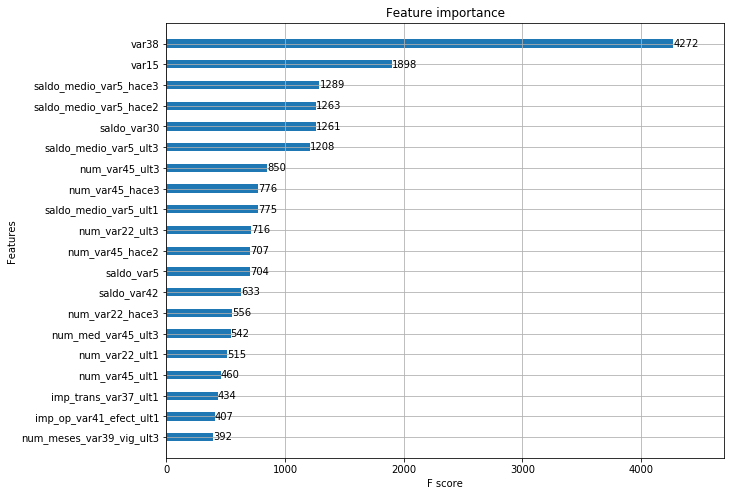

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [ ]:
# tree ensemble has a lot of parameter. performance does not increase as much for times spent on tuning
# feature engineer is better. take out null values, make new features

In [23]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801791	valid_0's binary_logloss: 0.155033
[3]	valid_0's auc: 0.803347	valid_0's binary_logloss: 0.151848
[4]	valid_0's auc: 0.804643	valid_0's binary_logloss: 0.14969
[5]	valid_0's auc: 0.808337	valid_0's binary_logloss: 0.14774
[6]	valid_0's auc: 0.810543	valid_0's binary_logloss: 0.146248
[7]	valid_0's auc: 0.815338	valid_0's binary_logloss: 0.144947
[8]	valid_0's auc: 0.816354	valid_0's binary_logloss: 0.143927
[9]	valid_0's auc: 0.817909	valid_0's binary_logloss: 0.143015
[10]	valid_0's auc: 0.818505	valid_0's binary_logloss: 0.142346
[11]	valid_0's auc: 0.818062	valid_0's binary_logloss: 0.14179
[12]	valid_0's auc: 0.819618	valid_0's binary_logloss: 0.141273
[13]	valid_0's auc: 0.820168	valid_0's binary_logloss: 0.140783
[14]	valid_0's auc: 0.821643	valid_0's binary_logloss: 0.140372
[15]	valid_0's auc: 0.821538	valid_0's binary_logloss:

In [25]:
from sklearn.model_selection import GridSearchCV

LGBM_clf=LGBMClassifier(n_estimators=200)

params={'num_leaves':[32, 64], 
       'max_depth':[128, 160],
       'min_child_samples':[60,100],
       'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)

C:\Users\DooDoo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829507	valid_0's binary_logloss: 0.15203	valid_1's auc: 0.79822	valid_1's binary_logloss: 0.154927
[3]	valid_0's auc: 0.834674	valid_0's binary_logloss: 0.147974	valid_1's auc: 0.800682	valid_1's binary_logloss: 0.1519
[4]	valid_0's auc: 0.841586	valid_0's binary_logloss: 0.144944	valid_1's auc: 0.806748	valid_1's binary_logloss: 0.149617
[5]	valid_0's auc: 0.845466	valid_0's binary_logloss: 0.142464	valid_1's auc: 0.812166	valid_1's binary_logloss: 0.147629
[6]	valid_0's auc: 0.846831	valid_0's binary_logloss: 0.140356	valid_1's auc: 0.812302	valid_1's binary_logloss: 0.146166
[7]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.138617	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.144915
[8]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.137114	valid_1's auc: 0.814566	val

[17]	valid_0's auc: 0.86585	valid_0's binary_logloss: 0.12916	valid_1's auc: 0.819443	valid_1's binary_logloss: 0.139473
[18]	valid_0's auc: 0.867129	valid_0's binary_logloss: 0.128596	valid_1's auc: 0.819342	valid_1's binary_logloss: 0.139283
[19]	valid_0's auc: 0.867988	valid_0's binary_logloss: 0.128093	valid_1's auc: 0.818945	valid_1's binary_logloss: 0.139217
[20]	valid_0's auc: 0.869463	valid_0's binary_logloss: 0.127658	valid_1's auc: 0.820062	valid_1's binary_logloss: 0.139041
[21]	valid_0's auc: 0.870407	valid_0's binary_logloss: 0.127196	valid_1's auc: 0.820255	valid_1's binary_logloss: 0.138914
[22]	valid_0's auc: 0.871522	valid_0's binary_logloss: 0.126731	valid_1's auc: 0.819604	valid_1's binary_logloss: 0.138934
[23]	valid_0's auc: 0.872375	valid_0's binary_logloss: 0.126352	valid_1's auc: 0.820358	valid_1's binary_logloss: 0.1388
[24]	valid_0's auc: 0.873258	valid_0's binary_logloss: 0.125964	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.138744
[25]	valid_0's auc: 

[15]	valid_0's auc: 0.86202	valid_0's binary_logloss: 0.130631	valid_1's auc: 0.816526	valid_1's binary_logloss: 0.140356
[16]	valid_0's auc: 0.863722	valid_0's binary_logloss: 0.129988	valid_1's auc: 0.817082	valid_1's binary_logloss: 0.140143
[17]	valid_0's auc: 0.864712	valid_0's binary_logloss: 0.129452	valid_1's auc: 0.818201	valid_1's binary_logloss: 0.139919
[18]	valid_0's auc: 0.865267	valid_0's binary_logloss: 0.128956	valid_1's auc: 0.817738	valid_1's binary_logloss: 0.139761
[19]	valid_0's auc: 0.866858	valid_0's binary_logloss: 0.12844	valid_1's auc: 0.818158	valid_1's binary_logloss: 0.139633
[20]	valid_0's auc: 0.868196	valid_0's binary_logloss: 0.127954	valid_1's auc: 0.818025	valid_1's binary_logloss: 0.139504
[21]	valid_0's auc: 0.868978	valid_0's binary_logloss: 0.127545	valid_1's auc: 0.817732	valid_1's binary_logloss: 0.139462
[22]	valid_0's auc: 0.869659	valid_0's binary_logloss: 0.127168	valid_1's auc: 0.818141	valid_1's binary_logloss: 0.139343
[23]	valid_0's auc

[43]	valid_0's auc: 0.886558	valid_0's binary_logloss: 0.120917	valid_1's auc: 0.821529	valid_1's binary_logloss: 0.138621
[44]	valid_0's auc: 0.887004	valid_0's binary_logloss: 0.120709	valid_1's auc: 0.821513	valid_1's binary_logloss: 0.138686
[45]	valid_0's auc: 0.887574	valid_0's binary_logloss: 0.120504	valid_1's auc: 0.821224	valid_1's binary_logloss: 0.13877
[46]	valid_0's auc: 0.887905	valid_0's binary_logloss: 0.120341	valid_1's auc: 0.82105	valid_1's binary_logloss: 0.138822
[47]	valid_0's auc: 0.88827	valid_0's binary_logloss: 0.120162	valid_1's auc: 0.820945	valid_1's binary_logloss: 0.138872
[48]	valid_0's auc: 0.888739	valid_0's binary_logloss: 0.119997	valid_1's auc: 0.820983	valid_1's binary_logloss: 0.138868
[49]	valid_0's auc: 0.889125	valid_0's binary_logloss: 0.119832	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.138856
[50]	valid_0's auc: 0.889422	valid_0's binary_logloss: 0.11968	valid_1's auc: 0.820719	valid_1's binary_logloss: 0.13893
[51]	valid_0's auc: 0

[43]	valid_0's auc: 0.885081	valid_0's binary_logloss: 0.121307	valid_1's auc: 0.815964	valid_1's binary_logloss: 0.139581
[44]	valid_0's auc: 0.885483	valid_0's binary_logloss: 0.12116	valid_1's auc: 0.816032	valid_1's binary_logloss: 0.139564
[45]	valid_0's auc: 0.885791	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.815834	valid_1's binary_logloss: 0.139659
[46]	valid_0's auc: 0.886296	valid_0's binary_logloss: 0.120826	valid_1's auc: 0.815924	valid_1's binary_logloss: 0.139675
[47]	valid_0's auc: 0.886848	valid_0's binary_logloss: 0.120603	valid_1's auc: 0.816112	valid_1's binary_logloss: 0.139675
[48]	valid_0's auc: 0.887196	valid_0's binary_logloss: 0.12038	valid_1's auc: 0.815796	valid_1's binary_logloss: 0.139744
[49]	valid_0's auc: 0.887555	valid_0's binary_logloss: 0.120199	valid_1's auc: 0.815678	valid_1's binary_logloss: 0.139744
[50]	valid_0's auc: 0.887781	valid_0's binary_logloss: 0.120058	valid_1's auc: 0.815136	valid_1's binary_logloss: 0.139844
[51]	valid_0's auc

[1]	valid_0's auc: 0.833597	valid_0's binary_logloss: 0.156627	valid_1's auc: 0.792798	valid_1's binary_logloss: 0.159086
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.150587	valid_1's auc: 0.807144	valid_1's binary_logloss: 0.154269
[3]	valid_0's auc: 0.850685	valid_0's binary_logloss: 0.146332	valid_1's auc: 0.806679	valid_1's binary_logloss: 0.15121
[4]	valid_0's auc: 0.854154	valid_0's binary_logloss: 0.14308	valid_1's auc: 0.809407	valid_1's binary_logloss: 0.148804
[5]	valid_0's auc: 0.857403	valid_0's binary_logloss: 0.140432	valid_1's auc: 0.812057	valid_1's binary_logloss: 0.146805
[6]	valid_0's auc: 0.860171	valid_0's binary_logloss: 0.138084	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.145172
[7]	valid_0's auc: 0.861569	valid_0's binary_logloss: 0.136154	valid_1's auc: 0.815655	valid_1's binary_logloss: 0.143964
[8]	valid_0's auc: 0.864208	valid_0's binary_logloss: 0.134519	valid_1's auc: 0.817062	

[9]	valid_0's auc: 0.866474	valid_0's binary_logloss: 0.133102	valid_1's auc: 0.816015	valid_1's binary_logloss: 0.142603
[10]	valid_0's auc: 0.868382	valid_0's binary_logloss: 0.13185	valid_1's auc: 0.81684	valid_1's binary_logloss: 0.141903
[11]	valid_0's auc: 0.869641	valid_0's binary_logloss: 0.130698	valid_1's auc: 0.817588	valid_1's binary_logloss: 0.141307
[12]	valid_0's auc: 0.870036	valid_0's binary_logloss: 0.129703	valid_1's auc: 0.81766	valid_1's binary_logloss: 0.140945
[13]	valid_0's auc: 0.872022	valid_0's binary_logloss: 0.128614	valid_1's auc: 0.818594	valid_1's binary_logloss: 0.14055
[14]	valid_0's auc: 0.873208	valid_0's binary_logloss: 0.127689	valid_1's auc: 0.818445	valid_1's binary_logloss: 0.140391
[15]	valid_0's auc: 0.875518	valid_0's binary_logloss: 0.126841	valid_1's auc: 0.818189	valid_1's binary_logloss: 0.140126
[16]	valid_0's auc: 0.876757	valid_0's binary_logloss: 0.126089	valid_1's auc: 0.817564	valid_1's binary_logloss: 0.139949
[17]	valid_0's auc: 0

[33]	valid_0's auc: 0.896002	valid_0's binary_logloss: 0.117107	valid_1's auc: 0.821461	valid_1's binary_logloss: 0.138873
[34]	valid_0's auc: 0.896609	valid_0's binary_logloss: 0.116709	valid_1's auc: 0.821443	valid_1's binary_logloss: 0.138934
[35]	valid_0's auc: 0.897836	valid_0's binary_logloss: 0.116366	valid_1's auc: 0.821188	valid_1's binary_logloss: 0.139031
[36]	valid_0's auc: 0.898417	valid_0's binary_logloss: 0.115998	valid_1's auc: 0.82094	valid_1's binary_logloss: 0.139113
[37]	valid_0's auc: 0.899508	valid_0's binary_logloss: 0.115604	valid_1's auc: 0.820531	valid_1's binary_logloss: 0.139157
[38]	valid_0's auc: 0.900111	valid_0's binary_logloss: 0.11523	valid_1's auc: 0.820571	valid_1's binary_logloss: 0.139156
[39]	valid_0's auc: 0.900728	valid_0's binary_logloss: 0.114939	valid_1's auc: 0.820599	valid_1's binary_logloss: 0.139159
[40]	valid_0's auc: 0.901247	valid_0's binary_logloss: 0.114624	valid_1's auc: 0.820598	valid_1's binary_logloss: 0.139183
[41]	valid_0's auc

[49]	valid_0's auc: 0.903497	valid_0's binary_logloss: 0.112778	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.139361
[50]	valid_0's auc: 0.903708	valid_0's binary_logloss: 0.11256	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.139392
[51]	valid_0's auc: 0.90395	valid_0's binary_logloss: 0.112356	valid_1's auc: 0.820883	valid_1's binary_logloss: 0.139493
[52]	valid_0's auc: 0.904114	valid_0's binary_logloss: 0.112164	valid_1's auc: 0.820447	valid_1's binary_logloss: 0.13959
[53]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.111962	valid_1's auc: 0.820247	valid_1's binary_logloss: 0.139656
[54]	valid_0's auc: 0.904565	valid_0's binary_logloss: 0.111753	valid_1's auc: 0.820085	valid_1's binary_logloss: 0.139704
[55]	valid_0's auc: 0.904816	valid_0's binary_logloss: 0.111541	valid_1's auc: 0.819457	valid_1's binary_logloss: 0.139851
[56]	valid_0's auc: 0.905148	valid_0's binary_logloss: 0.111304	valid_1's auc: 0.819545	valid_1's binary_logloss: 0.139896
[57]	valid_0's auc:

[16]	valid_0's auc: 0.860964	valid_0's binary_logloss: 0.130664	valid_1's auc: 0.820026	valid_1's binary_logloss: 0.139954
[17]	valid_0's auc: 0.861733	valid_0's binary_logloss: 0.130145	valid_1's auc: 0.820406	valid_1's binary_logloss: 0.139705
[18]	valid_0's auc: 0.863253	valid_0's binary_logloss: 0.129631	valid_1's auc: 0.820845	valid_1's binary_logloss: 0.13952
[19]	valid_0's auc: 0.864453	valid_0's binary_logloss: 0.129179	valid_1's auc: 0.821481	valid_1's binary_logloss: 0.139416
[20]	valid_0's auc: 0.865626	valid_0's binary_logloss: 0.128747	valid_1's auc: 0.821245	valid_1's binary_logloss: 0.139314
[21]	valid_0's auc: 0.866523	valid_0's binary_logloss: 0.128367	valid_1's auc: 0.821	valid_1's binary_logloss: 0.139255
[22]	valid_0's auc: 0.867191	valid_0's binary_logloss: 0.128024	valid_1's auc: 0.820872	valid_1's binary_logloss: 0.139171
[23]	valid_0's auc: 0.868488	valid_0's binary_logloss: 0.127623	valid_1's auc: 0.821504	valid_1's binary_logloss: 0.138985
[24]	valid_0's auc: 

[32]	valid_0's auc: 0.876122	valid_0's binary_logloss: 0.124556	valid_1's auc: 0.82322	valid_1's binary_logloss: 0.137793
[33]	valid_0's auc: 0.876579	valid_0's binary_logloss: 0.124351	valid_1's auc: 0.823398	valid_1's binary_logloss: 0.137816
[34]	valid_0's auc: 0.877397	valid_0's binary_logloss: 0.12412	valid_1's auc: 0.823066	valid_1's binary_logloss: 0.137851
[35]	valid_0's auc: 0.877959	valid_0's binary_logloss: 0.12394	valid_1's auc: 0.82338	valid_1's binary_logloss: 0.137791
[36]	valid_0's auc: 0.878691	valid_0's binary_logloss: 0.123728	valid_1's auc: 0.82334	valid_1's binary_logloss: 0.137828
[37]	valid_0's auc: 0.879229	valid_0's binary_logloss: 0.123513	valid_1's auc: 0.823259	valid_1's binary_logloss: 0.137873
[38]	valid_0's auc: 0.87977	valid_0's binary_logloss: 0.123345	valid_1's auc: 0.823807	valid_1's binary_logloss: 0.137792
[39]	valid_0's auc: 0.880471	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.823786	valid_1's binary_logloss: 0.137843
[40]	valid_0's auc: 0.

[46]	valid_0's auc: 0.882852	valid_0's binary_logloss: 0.122098	valid_1's auc: 0.821131	valid_1's binary_logloss: 0.13832
[47]	valid_0's auc: 0.883598	valid_0's binary_logloss: 0.121837	valid_1's auc: 0.821346	valid_1's binary_logloss: 0.138338
[48]	valid_0's auc: 0.884098	valid_0's binary_logloss: 0.121617	valid_1's auc: 0.821434	valid_1's binary_logloss: 0.138346
[49]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.121435	valid_1's auc: 0.820737	valid_1's binary_logloss: 0.138485
[50]	valid_0's auc: 0.885059	valid_0's binary_logloss: 0.121209	valid_1's auc: 0.82046	valid_1's binary_logloss: 0.138481
[51]	valid_0's auc: 0.885368	valid_0's binary_logloss: 0.121051	valid_1's auc: 0.82019	valid_1's binary_logloss: 0.138542
[52]	valid_0's auc: 0.885842	valid_0's binary_logloss: 0.120874	valid_1's auc: 0.82031	valid_1's binary_logloss: 0.138565
[53]	valid_0's auc: 0.886399	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.820231	valid_1's binary_logloss: 0.138556
[54]	valid_0's auc: 

[53]	valid_0's auc: 0.887934	valid_0's binary_logloss: 0.120413	valid_1's auc: 0.819023	valid_1's binary_logloss: 0.139303
Early stopping, best iteration is:
[23]	valid_0's auc: 0.868488	valid_0's binary_logloss: 0.127623	valid_1's auc: 0.821504	valid_1's binary_logloss: 0.138985
[1]	valid_0's auc: 0.826898	valid_0's binary_logloss: 0.157392	valid_1's auc: 0.793104	valid_1's binary_logloss: 0.159146
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.837016	valid_0's binary_logloss: 0.151987	valid_1's auc: 0.802925	valid_1's binary_logloss: 0.154697
[3]	valid_0's auc: 0.841542	valid_0's binary_logloss: 0.148144	valid_1's auc: 0.807993	valid_1's binary_logloss: 0.151604
[4]	valid_0's auc: 0.843777	valid_0's binary_logloss: 0.145169	valid_1's auc: 0.810853	valid_1's binary_logloss: 0.149183
[5]	valid_0's auc: 0.847713	valid_0's binary_logloss: 0.142682	valid_1's auc: 0.813153	valid_1's binary_logloss: 0.147177
[6]	valid_0's auc: 0.850293	valid_0's binary_log

[13]	valid_0's auc: 0.870567	valid_0's binary_logloss: 0.129764	valid_1's auc: 0.818557	valid_1's binary_logloss: 0.140495
[14]	valid_0's auc: 0.871327	valid_0's binary_logloss: 0.128974	valid_1's auc: 0.818364	valid_1's binary_logloss: 0.140167
[15]	valid_0's auc: 0.872879	valid_0's binary_logloss: 0.12815	valid_1's auc: 0.818995	valid_1's binary_logloss: 0.139874
[16]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.127389	valid_1's auc: 0.81851	valid_1's binary_logloss: 0.139644
[17]	valid_0's auc: 0.875482	valid_0's binary_logloss: 0.126662	valid_1's auc: 0.819001	valid_1's binary_logloss: 0.139417
[18]	valid_0's auc: 0.876405	valid_0's binary_logloss: 0.126032	valid_1's auc: 0.820132	valid_1's binary_logloss: 0.139177
[19]	valid_0's auc: 0.877551	valid_0's binary_logloss: 0.125451	valid_1's auc: 0.820231	valid_1's binary_logloss: 0.139118
[20]	valid_0's auc: 0.878559	valid_0's binary_logloss: 0.124917	valid_1's auc: 0.820274	valid_1's binary_logloss: 0.13901
[21]	valid_0's auc:

[23]	valid_0's auc: 0.882822	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.823706	valid_1's binary_logloss: 0.137959
[24]	valid_0's auc: 0.883853	valid_0's binary_logloss: 0.122754	valid_1's auc: 0.823775	valid_1's binary_logloss: 0.137854
[25]	valid_0's auc: 0.884726	valid_0's binary_logloss: 0.122306	valid_1's auc: 0.823747	valid_1's binary_logloss: 0.13788
[26]	valid_0's auc: 0.885454	valid_0's binary_logloss: 0.121908	valid_1's auc: 0.823417	valid_1's binary_logloss: 0.137912
[27]	valid_0's auc: 0.886893	valid_0's binary_logloss: 0.121423	valid_1's auc: 0.823524	valid_1's binary_logloss: 0.137901
[28]	valid_0's auc: 0.887958	valid_0's binary_logloss: 0.120985	valid_1's auc: 0.824045	valid_1's binary_logloss: 0.137859
[29]	valid_0's auc: 0.88871	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.823394	valid_1's binary_logloss: 0.137958
[30]	valid_0's auc: 0.889447	valid_0's binary_logloss: 0.120204	valid_1's auc: 0.822419	valid_1's binary_logloss: 0.138126
[31]	valid_0's auc

[38]	valid_0's auc: 0.895338	valid_0's binary_logloss: 0.117501	valid_1's auc: 0.813883	valid_1's binary_logloss: 0.140194
[39]	valid_0's auc: 0.896032	valid_0's binary_logloss: 0.117151	valid_1's auc: 0.813597	valid_1's binary_logloss: 0.140244
[40]	valid_0's auc: 0.896495	valid_0's binary_logloss: 0.116849	valid_1's auc: 0.813532	valid_1's binary_logloss: 0.140319
[41]	valid_0's auc: 0.896956	valid_0's binary_logloss: 0.116574	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.140396
[42]	valid_0's auc: 0.897664	valid_0's binary_logloss: 0.116218	valid_1's auc: 0.812965	valid_1's binary_logloss: 0.140485
[43]	valid_0's auc: 0.898295	valid_0's binary_logloss: 0.115905	valid_1's auc: 0.812361	valid_1's binary_logloss: 0.140644
[44]	valid_0's auc: 0.899018	valid_0's binary_logloss: 0.115618	valid_1's auc: 0.8124	valid_1's binary_logloss: 0.140655
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870965	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.817277	valid_1's binary_l

[1]	valid_0's auc: 0.835599	valid_0's binary_logloss: 0.156828	valid_1's auc: 0.794009	valid_1's binary_logloss: 0.158961
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844679	valid_0's binary_logloss: 0.151106	valid_1's auc: 0.800884	valid_1's binary_logloss: 0.154501
[3]	valid_0's auc: 0.850355	valid_0's binary_logloss: 0.146966	valid_1's auc: 0.805962	valid_1's binary_logloss: 0.151429
[4]	valid_0's auc: 0.854061	valid_0's binary_logloss: 0.143781	valid_1's auc: 0.808405	valid_1's binary_logloss: 0.148943
[5]	valid_0's auc: 0.857803	valid_0's binary_logloss: 0.141209	valid_1's auc: 0.811798	valid_1's binary_logloss: 0.147036
[6]	valid_0's auc: 0.862405	valid_0's binary_logloss: 0.138865	valid_1's auc: 0.813969	valid_1's binary_logloss: 0.145318
[7]	valid_0's auc: 0.863826	valid_0's binary_logloss: 0.136992	valid_1's auc: 0.816857	valid_1's binary_logloss: 0.143972
[8]	valid_0's auc: 0.865406	valid_0's binary_logloss: 0.135358	valid_1's auc: 0.81869

[16]	valid_0's auc: 0.873925	valid_0's binary_logloss: 0.127605	valid_1's auc: 0.815679	valid_1's binary_logloss: 0.140061
[17]	valid_0's auc: 0.875064	valid_0's binary_logloss: 0.126889	valid_1's auc: 0.814656	valid_1's binary_logloss: 0.140003
[18]	valid_0's auc: 0.876484	valid_0's binary_logloss: 0.126249	valid_1's auc: 0.815305	valid_1's binary_logloss: 0.139817
[19]	valid_0's auc: 0.87793	valid_0's binary_logloss: 0.125649	valid_1's auc: 0.814679	valid_1's binary_logloss: 0.139831
[20]	valid_0's auc: 0.879126	valid_0's binary_logloss: 0.125085	valid_1's auc: 0.81409	valid_1's binary_logloss: 0.139865
[21]	valid_0's auc: 0.880535	valid_0's binary_logloss: 0.124515	valid_1's auc: 0.815122	valid_1's binary_logloss: 0.139729
[22]	valid_0's auc: 0.881859	valid_0's binary_logloss: 0.123994	valid_1's auc: 0.814883	valid_1's binary_logloss: 0.139699
[23]	valid_0's auc: 0.883004	valid_0's binary_logloss: 0.123468	valid_1's auc: 0.815492	valid_1's binary_logloss: 0.139638
[24]	valid_0's auc

[43]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.121319	valid_1's auc: 0.819437	valid_1's binary_logloss: 0.139163
[44]	valid_0's auc: 0.885547	valid_0's binary_logloss: 0.121101	valid_1's auc: 0.819168	valid_1's binary_logloss: 0.13921
[45]	valid_0's auc: 0.886114	valid_0's binary_logloss: 0.120847	valid_1's auc: 0.818989	valid_1's binary_logloss: 0.139268
[46]	valid_0's auc: 0.886897	valid_0's binary_logloss: 0.12063	valid_1's auc: 0.819311	valid_1's binary_logloss: 0.139268
[47]	valid_0's auc: 0.887333	valid_0's binary_logloss: 0.120406	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.139421
[48]	valid_0's auc: 0.8877	valid_0's binary_logloss: 0.120229	valid_1's auc: 0.818508	valid_1's binary_logloss: 0.139464
[49]	valid_0's auc: 0.888065	valid_0's binary_logloss: 0.120082	valid_1's auc: 0.818379	valid_1's binary_logloss: 0.139464
Early stopping, best iteration is:
[19]	valid_0's auc: 0.866254	valid_0's binary_logloss: 0.128497	valid_1's auc: 0.820648	valid_1's binary_logl

[63]	valid_0's auc: 0.892963	valid_0's binary_logloss: 0.117829	valid_1's auc: 0.819021	valid_1's binary_logloss: 0.139557
[64]	valid_0's auc: 0.893176	valid_0's binary_logloss: 0.117694	valid_1's auc: 0.819007	valid_1's binary_logloss: 0.139575
[65]	valid_0's auc: 0.893416	valid_0's binary_logloss: 0.117541	valid_1's auc: 0.818856	valid_1's binary_logloss: 0.139588
[66]	valid_0's auc: 0.893533	valid_0's binary_logloss: 0.117444	valid_1's auc: 0.81869	valid_1's binary_logloss: 0.139663
[67]	valid_0's auc: 0.894404	valid_0's binary_logloss: 0.117241	valid_1's auc: 0.818787	valid_1's binary_logloss: 0.13965
[68]	valid_0's auc: 0.89465	valid_0's binary_logloss: 0.117105	valid_1's auc: 0.818677	valid_1's binary_logloss: 0.139697
[69]	valid_0's auc: 0.894931	valid_0's binary_logloss: 0.116955	valid_1's auc: 0.818416	valid_1's binary_logloss: 0.139764
[70]	valid_0's auc: 0.895025	valid_0's binary_logloss: 0.116867	valid_1's auc: 0.81827	valid_1's binary_logloss: 0.139822
[71]	valid_0's auc: 

[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829507	valid_0's binary_logloss: 0.15203	valid_1's auc: 0.79822	valid_1's binary_logloss: 0.154927
[3]	valid_0's auc: 0.834674	valid_0's binary_logloss: 0.147974	valid_1's auc: 0.800682	valid_1's binary_logloss: 0.1519
[4]	valid_0's auc: 0.841586	valid_0's binary_logloss: 0.144944	valid_1's auc: 0.806748	valid_1's binary_logloss: 0.149617
[5]	valid_0's auc: 0.845466	valid_0's binary_logloss: 0.142464	valid_1's auc: 0.812166	valid_1's binary_logloss: 0.147629
[6]	valid_0's auc: 0.846831	valid_0's binary_logloss: 0.140356	valid_1's auc: 0.812302	valid_1's binary_logloss: 0.146166
[7]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.138617	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.144915
[8]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.137114	valid_1's auc: 0.814566	val

[20]	valid_0's auc: 0.869463	valid_0's binary_logloss: 0.127658	valid_1's auc: 0.820062	valid_1's binary_logloss: 0.139041
[21]	valid_0's auc: 0.870407	valid_0's binary_logloss: 0.127196	valid_1's auc: 0.820255	valid_1's binary_logloss: 0.138914
[22]	valid_0's auc: 0.871522	valid_0's binary_logloss: 0.126731	valid_1's auc: 0.819604	valid_1's binary_logloss: 0.138934
[23]	valid_0's auc: 0.872375	valid_0's binary_logloss: 0.126352	valid_1's auc: 0.820358	valid_1's binary_logloss: 0.1388
[24]	valid_0's auc: 0.873258	valid_0's binary_logloss: 0.125964	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.138744
[25]	valid_0's auc: 0.873962	valid_0's binary_logloss: 0.12561	valid_1's auc: 0.820434	valid_1's binary_logloss: 0.138744
[26]	valid_0's auc: 0.874686	valid_0's binary_logloss: 0.125289	valid_1's auc: 0.82042	valid_1's binary_logloss: 0.138684
[27]	valid_0's auc: 0.875859	valid_0's binary_logloss: 0.124932	valid_1's auc: 0.820818	valid_1's binary_logloss: 0.138643
[28]	valid_0's auc: 

[16]	valid_0's auc: 0.863722	valid_0's binary_logloss: 0.129988	valid_1's auc: 0.817082	valid_1's binary_logloss: 0.140143
[17]	valid_0's auc: 0.864712	valid_0's binary_logloss: 0.129452	valid_1's auc: 0.818201	valid_1's binary_logloss: 0.139919
[18]	valid_0's auc: 0.865267	valid_0's binary_logloss: 0.128956	valid_1's auc: 0.817738	valid_1's binary_logloss: 0.139761
[19]	valid_0's auc: 0.866858	valid_0's binary_logloss: 0.12844	valid_1's auc: 0.818158	valid_1's binary_logloss: 0.139633
[20]	valid_0's auc: 0.868196	valid_0's binary_logloss: 0.127954	valid_1's auc: 0.818025	valid_1's binary_logloss: 0.139504
[21]	valid_0's auc: 0.868978	valid_0's binary_logloss: 0.127545	valid_1's auc: 0.817732	valid_1's binary_logloss: 0.139462
[22]	valid_0's auc: 0.869659	valid_0's binary_logloss: 0.127168	valid_1's auc: 0.818141	valid_1's binary_logloss: 0.139343
[23]	valid_0's auc: 0.870605	valid_0's binary_logloss: 0.126766	valid_1's auc: 0.818161	valid_1's binary_logloss: 0.139218
[24]	valid_0's au

[28]	valid_0's auc: 0.891771	valid_0's binary_logloss: 0.119119	valid_1's auc: 0.822638	valid_1's binary_logloss: 0.138595
[29]	valid_0's auc: 0.89244	valid_0's binary_logloss: 0.118696	valid_1's auc: 0.822415	valid_1's binary_logloss: 0.138692
[30]	valid_0's auc: 0.893139	valid_0's binary_logloss: 0.118291	valid_1's auc: 0.82236	valid_1's binary_logloss: 0.138668
[31]	valid_0's auc: 0.893907	valid_0's binary_logloss: 0.117883	valid_1's auc: 0.82227	valid_1's binary_logloss: 0.138704
[32]	valid_0's auc: 0.895063	valid_0's binary_logloss: 0.117532	valid_1's auc: 0.821565	valid_1's binary_logloss: 0.138836
[33]	valid_0's auc: 0.896002	valid_0's binary_logloss: 0.117107	valid_1's auc: 0.821461	valid_1's binary_logloss: 0.138873
[34]	valid_0's auc: 0.896609	valid_0's binary_logloss: 0.116709	valid_1's auc: 0.821443	valid_1's binary_logloss: 0.138934
[35]	valid_0's auc: 0.897836	valid_0's binary_logloss: 0.116366	valid_1's auc: 0.821188	valid_1's binary_logloss: 0.139031
[36]	valid_0's auc:

[44]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.113944	valid_1's auc: 0.820683	valid_1's binary_logloss: 0.139195
[45]	valid_0's auc: 0.902233	valid_0's binary_logloss: 0.113742	valid_1's auc: 0.821216	valid_1's binary_logloss: 0.139184
[46]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.113515	valid_1's auc: 0.820964	valid_1's binary_logloss: 0.139246
[47]	valid_0's auc: 0.902947	valid_0's binary_logloss: 0.113254	valid_1's auc: 0.821187	valid_1's binary_logloss: 0.139252
[48]	valid_0's auc: 0.903292	valid_0's binary_logloss: 0.113006	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.139304
[49]	valid_0's auc: 0.903497	valid_0's binary_logloss: 0.112778	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.139361
[50]	valid_0's auc: 0.903708	valid_0's binary_logloss: 0.11256	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.139392
[51]	valid_0's auc: 0.90395	valid_0's binary_logloss: 0.112356	valid_1's auc: 0.820883	valid_1's binary_logloss: 0.139493
[52]	valid_0's auc

[9]	valid_0's auc: 0.865634	valid_0's binary_logloss: 0.132973	valid_1's auc: 0.82018	valid_1's binary_logloss: 0.142429
[10]	valid_0's auc: 0.866899	valid_0's binary_logloss: 0.131679	valid_1's auc: 0.820711	valid_1's binary_logloss: 0.141745
[11]	valid_0's auc: 0.868441	valid_0's binary_logloss: 0.130516	valid_1's auc: 0.820859	valid_1's binary_logloss: 0.141288
[12]	valid_0's auc: 0.869239	valid_0's binary_logloss: 0.129528	valid_1's auc: 0.821361	valid_1's binary_logloss: 0.140664
[13]	valid_0's auc: 0.870139	valid_0's binary_logloss: 0.128579	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.140244
[14]	valid_0's auc: 0.872237	valid_0's binary_logloss: 0.127715	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.139979
[15]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.126845	valid_1's auc: 0.821797	valid_1's binary_logloss: 0.139747
[16]	valid_0's auc: 0.875872	valid_0's binary_logloss: 0.126003	valid_1's auc: 0.821916	valid_1's binary_logloss: 0.139542
[17]	valid_0's auc

[27]	valid_0's auc: 0.888489	valid_0's binary_logloss: 0.120023	valid_1's auc: 0.820417	valid_1's binary_logloss: 0.138635
[28]	valid_0's auc: 0.889234	valid_0's binary_logloss: 0.119626	valid_1's auc: 0.820992	valid_1's binary_logloss: 0.138509
[29]	valid_0's auc: 0.890437	valid_0's binary_logloss: 0.119227	valid_1's auc: 0.821477	valid_1's binary_logloss: 0.138476
[30]	valid_0's auc: 0.891221	valid_0's binary_logloss: 0.11885	valid_1's auc: 0.820799	valid_1's binary_logloss: 0.138574
[31]	valid_0's auc: 0.892164	valid_0's binary_logloss: 0.118401	valid_1's auc: 0.821192	valid_1's binary_logloss: 0.138555
[32]	valid_0's auc: 0.892856	valid_0's binary_logloss: 0.118048	valid_1's auc: 0.821184	valid_1's binary_logloss: 0.138601
[33]	valid_0's auc: 0.894313	valid_0's binary_logloss: 0.117655	valid_1's auc: 0.821687	valid_1's binary_logloss: 0.138569
[34]	valid_0's auc: 0.894999	valid_0's binary_logloss: 0.117262	valid_1's auc: 0.821634	valid_1's binary_logloss: 0.138598
[35]	valid_0's au

[38]	valid_0's auc: 0.896954	valid_0's binary_logloss: 0.115895	valid_1's auc: 0.814652	valid_1's binary_logloss: 0.140372
[39]	valid_0's auc: 0.897327	valid_0's binary_logloss: 0.115622	valid_1's auc: 0.81417	valid_1's binary_logloss: 0.140536
[40]	valid_0's auc: 0.89805	valid_0's binary_logloss: 0.11534	valid_1's auc: 0.814318	valid_1's binary_logloss: 0.14052
[41]	valid_0's auc: 0.898802	valid_0's binary_logloss: 0.115015	valid_1's auc: 0.814279	valid_1's binary_logloss: 0.140644
[42]	valid_0's auc: 0.899415	valid_0's binary_logloss: 0.114716	valid_1's auc: 0.81437	valid_1's binary_logloss: 0.140727
[43]	valid_0's auc: 0.899641	valid_0's binary_logloss: 0.11449	valid_1's auc: 0.814159	valid_1's binary_logloss: 0.140827
Early stopping, best iteration is:
[13]	valid_0's auc: 0.872022	valid_0's binary_logloss: 0.128614	valid_1's auc: 0.818594	valid_1's binary_logloss: 0.14055
[1]	valid_0's auc: 0.824362	valid_0's binary_logloss: 0.157758	valid_1's auc: 0.787152	valid_1's binary_logloss

[11]	valid_0's auc: 0.856584	valid_0's binary_logloss: 0.13404	valid_1's auc: 0.820639	valid_1's binary_logloss: 0.140864
[12]	valid_0's auc: 0.858041	valid_0's binary_logloss: 0.133166	valid_1's auc: 0.82165	valid_1's binary_logloss: 0.140305
[13]	valid_0's auc: 0.859278	valid_0's binary_logloss: 0.132379	valid_1's auc: 0.821382	valid_1's binary_logloss: 0.139946
[14]	valid_0's auc: 0.860193	valid_0's binary_logloss: 0.131676	valid_1's auc: 0.821501	valid_1's binary_logloss: 0.13956
[15]	valid_0's auc: 0.860881	valid_0's binary_logloss: 0.131036	valid_1's auc: 0.821589	valid_1's binary_logloss: 0.13922
[16]	valid_0's auc: 0.862001	valid_0's binary_logloss: 0.130482	valid_1's auc: 0.822238	valid_1's binary_logloss: 0.138954
[17]	valid_0's auc: 0.863119	valid_0's binary_logloss: 0.129939	valid_1's auc: 0.822696	valid_1's binary_logloss: 0.138596
[18]	valid_0's auc: 0.863774	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.822555	valid_1's binary_logloss: 0.138463
[19]	valid_0's auc: 

[27]	valid_0's auc: 0.871493	valid_0's binary_logloss: 0.126343	valid_1's auc: 0.82178	valid_1's binary_logloss: 0.138136
[28]	valid_0's auc: 0.87243	valid_0's binary_logloss: 0.126036	valid_1's auc: 0.822207	valid_1's binary_logloss: 0.138071
[29]	valid_0's auc: 0.872761	valid_0's binary_logloss: 0.125807	valid_1's auc: 0.822083	valid_1's binary_logloss: 0.138083
[30]	valid_0's auc: 0.873463	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.821531	valid_1's binary_logloss: 0.138119
[31]	valid_0's auc: 0.874169	valid_0's binary_logloss: 0.125228	valid_1's auc: 0.821726	valid_1's binary_logloss: 0.138125
[32]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.822393	valid_1's binary_logloss: 0.138035
[33]	valid_0's auc: 0.875485	valid_0's binary_logloss: 0.124774	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.138012
[34]	valid_0's auc: 0.875991	valid_0's binary_logloss: 0.124562	valid_1's auc: 0.822767	valid_1's binary_logloss: 0.138003
[35]	valid_0's auc

[32]	valid_0's auc: 0.875693	valid_0's binary_logloss: 0.12489	valid_1's auc: 0.820852	valid_1's binary_logloss: 0.138859
[33]	valid_0's auc: 0.876569	valid_0's binary_logloss: 0.124673	valid_1's auc: 0.821357	valid_1's binary_logloss: 0.138812
[34]	valid_0's auc: 0.877301	valid_0's binary_logloss: 0.124405	valid_1's auc: 0.82099	valid_1's binary_logloss: 0.138879
[35]	valid_0's auc: 0.878525	valid_0's binary_logloss: 0.124129	valid_1's auc: 0.821194	valid_1's binary_logloss: 0.138884
[36]	valid_0's auc: 0.879149	valid_0's binary_logloss: 0.123887	valid_1's auc: 0.820905	valid_1's binary_logloss: 0.13894
[37]	valid_0's auc: 0.879614	valid_0's binary_logloss: 0.123687	valid_1's auc: 0.820969	valid_1's binary_logloss: 0.138959
[38]	valid_0's auc: 0.880283	valid_0's binary_logloss: 0.123451	valid_1's auc: 0.821052	valid_1's binary_logloss: 0.138965
[39]	valid_0's auc: 0.881128	valid_0's binary_logloss: 0.123175	valid_1's auc: 0.821152	valid_1's binary_logloss: 0.138948
[40]	valid_0's auc:

[49]	valid_0's auc: 0.885846	valid_0's binary_logloss: 0.121123	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138247
[50]	valid_0's auc: 0.886369	valid_0's binary_logloss: 0.120923	valid_1's auc: 0.822283	valid_1's binary_logloss: 0.138247
[51]	valid_0's auc: 0.886731	valid_0's binary_logloss: 0.120732	valid_1's auc: 0.82152	valid_1's binary_logloss: 0.138429
[52]	valid_0's auc: 0.887173	valid_0's binary_logloss: 0.120556	valid_1's auc: 0.82156	valid_1's binary_logloss: 0.13845
[53]	valid_0's auc: 0.887495	valid_0's binary_logloss: 0.120403	valid_1's auc: 0.821645	valid_1's binary_logloss: 0.138456
Early stopping, best iteration is:
[23]	valid_0's auc: 0.869501	valid_0's binary_logloss: 0.127235	valid_1's auc: 0.824787	valid_1's binary_logloss: 0.137666
[1]	valid_0's auc: 0.829373	valid_0's binary_logloss: 0.157768	valid_1's auc: 0.802426	valid_1's binary_logloss: 0.159012
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.836194	valid_0's binary_lo

[1]	valid_0's auc: 0.83413	valid_0's binary_logloss: 0.157103	valid_1's auc: 0.791002	valid_1's binary_logloss: 0.159284
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841248	valid_0's binary_logloss: 0.151267	valid_1's auc: 0.801528	valid_1's binary_logloss: 0.154678
[3]	valid_0's auc: 0.849483	valid_0's binary_logloss: 0.147	valid_1's auc: 0.809311	valid_1's binary_logloss: 0.151346
[4]	valid_0's auc: 0.85457	valid_0's binary_logloss: 0.143757	valid_1's auc: 0.813695	valid_1's binary_logloss: 0.149049
[5]	valid_0's auc: 0.857017	valid_0's binary_logloss: 0.141125	valid_1's auc: 0.815105	valid_1's binary_logloss: 0.147204
[6]	valid_0's auc: 0.859747	valid_0's binary_logloss: 0.138857	valid_1's auc: 0.816802	valid_1's binary_logloss: 0.145704
[7]	valid_0's auc: 0.86116	valid_0's binary_logloss: 0.136927	valid_1's auc: 0.817349	valid_1's binary_logloss: 0.144466
[8]	valid_0's auc: 0.863105	valid_0's binary_logloss: 0.13528	valid_1's auc: 0.818097	valid

[7]	valid_0's auc: 0.863826	valid_0's binary_logloss: 0.136992	valid_1's auc: 0.816857	valid_1's binary_logloss: 0.143972
[8]	valid_0's auc: 0.865406	valid_0's binary_logloss: 0.135358	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.142775
[9]	valid_0's auc: 0.866658	valid_0's binary_logloss: 0.133889	valid_1's auc: 0.82007	valid_1's binary_logloss: 0.141805
[10]	valid_0's auc: 0.868767	valid_0's binary_logloss: 0.132586	valid_1's auc: 0.821431	valid_1's binary_logloss: 0.141176
[11]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.1315	valid_1's auc: 0.82184	valid_1's binary_logloss: 0.140571
[12]	valid_0's auc: 0.870916	valid_0's binary_logloss: 0.130456	valid_1's auc: 0.821901	valid_1's binary_logloss: 0.14005
[13]	valid_0's auc: 0.872158	valid_0's binary_logloss: 0.129555	valid_1's auc: 0.821789	valid_1's binary_logloss: 0.13971
[14]	valid_0's auc: 0.872681	valid_0's binary_logloss: 0.128791	valid_1's auc: 0.82166	valid_1's binary_logloss: 0.139407
[15]	valid_0's auc: 0.8740

[21]	valid_0's auc: 0.880535	valid_0's binary_logloss: 0.124515	valid_1's auc: 0.815122	valid_1's binary_logloss: 0.139729
[22]	valid_0's auc: 0.881859	valid_0's binary_logloss: 0.123994	valid_1's auc: 0.814883	valid_1's binary_logloss: 0.139699
[23]	valid_0's auc: 0.883004	valid_0's binary_logloss: 0.123468	valid_1's auc: 0.815492	valid_1's binary_logloss: 0.139638
[24]	valid_0's auc: 0.884313	valid_0's binary_logloss: 0.122923	valid_1's auc: 0.815759	valid_1's binary_logloss: 0.139593
[25]	valid_0's auc: 0.885457	valid_0's binary_logloss: 0.122437	valid_1's auc: 0.815991	valid_1's binary_logloss: 0.139602
[26]	valid_0's auc: 0.886365	valid_0's binary_logloss: 0.121974	valid_1's auc: 0.815656	valid_1's binary_logloss: 0.139661
[27]	valid_0's auc: 0.887431	valid_0's binary_logloss: 0.121538	valid_1's auc: 0.815472	valid_1's binary_logloss: 0.139721
[28]	valid_0's auc: 0.888196	valid_0's binary_logloss: 0.121152	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.139731
[29]	valid_0's a

[43]	valid_0's auc: 0.900036	valid_0's binary_logloss: 0.115408	valid_1's auc: 0.819644	valid_1's binary_logloss: 0.139382
[44]	valid_0's auc: 0.900468	valid_0's binary_logloss: 0.115154	valid_1's auc: 0.819509	valid_1's binary_logloss: 0.139435
[45]	valid_0's auc: 0.90103	valid_0's binary_logloss: 0.114862	valid_1's auc: 0.819055	valid_1's binary_logloss: 0.139615
[46]	valid_0's auc: 0.901426	valid_0's binary_logloss: 0.1146	valid_1's auc: 0.81855	valid_1's binary_logloss: 0.139754
[47]	valid_0's auc: 0.901746	valid_0's binary_logloss: 0.114341	valid_1's auc: 0.818871	valid_1's binary_logloss: 0.139755
[48]	valid_0's auc: 0.902155	valid_0's binary_logloss: 0.114099	valid_1's auc: 0.818414	valid_1's binary_logloss: 0.13988
[49]	valid_0's auc: 0.902412	valid_0's binary_logloss: 0.113855	valid_1's auc: 0.818001	valid_1's binary_logloss: 0.139983
[50]	valid_0's auc: 0.902852	valid_0's binary_logloss: 0.113616	valid_1's auc: 0.817863	valid_1's binary_logloss: 0.140031
[51]	valid_0's auc: 0

[50]	valid_0's auc: 0.901587	valid_0's binary_logloss: 0.114087	valid_1's auc: 0.819516	valid_1's binary_logloss: 0.139646
[51]	valid_0's auc: 0.901868	valid_0's binary_logloss: 0.113888	valid_1's auc: 0.8191	valid_1's binary_logloss: 0.139754
[52]	valid_0's auc: 0.902462	valid_0's binary_logloss: 0.113552	valid_1's auc: 0.818957	valid_1's binary_logloss: 0.139819
[53]	valid_0's auc: 0.902853	valid_0's binary_logloss: 0.113295	valid_1's auc: 0.818879	valid_1's binary_logloss: 0.139905
[54]	valid_0's auc: 0.903145	valid_0's binary_logloss: 0.113105	valid_1's auc: 0.819191	valid_1's binary_logloss: 0.139894
Early stopping, best iteration is:
[24]	valid_0's auc: 0.883853	valid_0's binary_logloss: 0.122754	valid_1's auc: 0.823775	valid_1's binary_logloss: 0.137854
[1]	valid_0's auc: 0.837123	valid_0's binary_logloss: 0.157258	valid_1's auc: 0.805344	valid_1's binary_logloss: 0.158947
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845057	valid_0's binary_l

In [26]:

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 32, subsample=0.8, min_child_samples =100, max_depth = 128)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(lgbm_roc_score)

[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803464	valid_0's binary_logloss: 0.154877
[3]	valid_0's auc: 0.805765	valid_0's binary_logloss: 0.151748
[4]	valid_0's auc: 0.809935	valid_0's binary_logloss: 0.14938
[5]	valid_0's auc: 0.814453	valid_0's binary_logloss: 0.147462
[6]	valid_0's auc: 0.818035	valid_0's binary_logloss: 0.14583
[7]	valid_0's auc: 0.818513	valid_0's binary_logloss: 0.144624
[8]	valid_0's auc: 0.818617	valid_0's binary_logloss: 0.143573
[9]	valid_0's auc: 0.818935	valid_0's binary_logloss: 0.142726
[10]	valid_0's auc: 0.819606	valid_0's binary_logloss: 0.14207
[11]	valid_0's auc: 0.820042	valid_0's binary_logloss: 0.141473
[12]	valid_0's auc: 0.820896	valid_0's binary_logloss: 0.140912
[13]	valid_0's auc: 0.82134	valid_0's binary_logloss: 0.140369
[14]	valid_0's auc: 0.821024	valid_0's binary_logloss: 0.140055
[15]	valid_0's auc: 0.822063	valid_0's binary_logloss: 